In [2]:
# Loading the dataset
# Importing pandas library
import pandas as pd
# Reading the dataset
mydata = pd.read_csv('E:/SLTechDocs/Data/Flood.csv')

In [3]:
mydata

,Time,Area,RH,ET,P,AT,SM,GHF
0,1/1/2005,3563530.00,65.396004,0.000003,3.757262,12.265436,1.301278,17.165691
1,1/2/2005,3474497.25,68.874268,0.000002,4.382504,13.751855,1.320082,18.168137
2,1/3/2005,3467959.75,77.067459,0.000004,17.027948,10.879114,1.377332,1.645442
3,1/4/2005,3605078.50,73.839661,0.000005,40.451202,6.159296,1.406343,-8.523001
4,1/5/2005,3945098.25,79.737579,0.000005,23.137531,2.658197,1.457837,-16.406815
...,...,...,...,...,...,...,...,...
3989,12/4/2015,2558446.25,70.756050,0.000004,0.084317,4.142236,1.330013,-15.481495
3990,12/5/2015,2553516.75,76.970886,0.000004,0.119789,4.088312,1.323480,-12.413648
3991,12/6/2015,2552695.50,80.957146,0.000003,0.182801,5.052332,1.317485,-3.347597
3992,12/7/2015,2545706.50,79.400673,0.000004,0.241517,6.233972,1.313668,-6.115736


In [4]:
mydata.describe()

,Area,RH,ET,P,AT,SM,GHF
count,3.994000e+03,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000
mean,2.828388e+06,15.020703,0.000024,3.134611,14.031194,1.222583,0.558555
std,1.235075e+06,594.092895,0.000017,5.791662,10.815100,0.146059,12.848126
min,1.170620e+06,-9999.000000,-0.000001,0.000000,-15.540076,0.698136,-68.185898
25%,1.863795e+06,42.761028,0.000007,0.055491,5.142480,1.134451,-5.466526
50%,2.569146e+06,49.047647,0.000021,0.479799,14.949548,1.248526,2.817404
75%,3.612540e+06,56.245806,0.000040,3.720712,23.502130,1.332297,8.202606
max,6.852320e+06,94.331871,0.000062,72.185623,35.047968,1.548314,57.051323


In [5]:
seed = 7

In [ ]:
# Preapring the target and feature data

In [7]:
# The target y
y = mydata['Area']

In [8]:
y.shape

(3994,)

In [9]:
print(y[:5])

0    3563530.00
1    3474497.25
2    3467959.75
3    3605078.50
4    3945098.25
Name: Area, dtype: float64


In [10]:
# The features
X = mydata.drop(['Time', 'Area'], axis = 1)

In [11]:
X.shape

(3994, 6)

In [12]:
print(X[:5])

          RH        ET          P         AT        SM        GHF
0  65.396004  0.000003   3.757262  12.265436  1.301278  17.165691
1  68.874268  0.000002   4.382504  13.751855  1.320082  18.168137
2  77.067459  0.000004  17.027948  10.879114  1.377332   1.645442
3  73.839661  0.000005  40.451202   6.159296  1.406343  -8.523001
4  79.737579  0.000005  23.137531   2.658197  1.457837 -16.406815


In [ ]:
# VIF and Scaling/standardizing

In [13]:
# Splitting the dataset into training and testing dataset
# Import train_test_split ()
from sklearn.model_selection import train_test_split

In [14]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30, shuffle = True)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2995, 6) (999, 6) (2995,) (999,)


In [ ]:
# Best Parameters Search

In [48]:
# Importing the necessary functionsand libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from numpy import absolute

In [24]:
# Importing warnings() to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [29]:
# RF Best parameters search
model = RandomForestRegressor()
rf_param_grid = {'n_estimators':[50, 100, 150],
                 'max_depth': ['None', 3, 6],
                 'min_samples_leaf': [1, 2, 3],
                 'min_samples_split': [2, 4, 6],
                 'max_leaf_nodes':['None', 1, 2]
}
rf_cv = KFold(n_splits = 5, random_state = 1, shuffle = True)
rf = GridSearchCV(model, rf_param_grid, cv = rf_cv, scoring = 'neg_mean_squared_error', n_jobs = -1)
rf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': ['None', 3, 6],
                         'max_leaf_nodes': ['None', 1, 2],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [31]:
# # Printing the best parameters andd score
print('The best parameters are:', rf.best_params_)
print('The best score is:', rf.best_score_)

The best parameters are: {'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50}
The best score is: -1001600576227.7058


In [ ]:
# RF modeling using the best parameters and fitting on the training dataset

In [33]:
# Initialiazing the model
model = RandomForestRegressor(max_depth = 6, max_leaf_nodes = 2, min_samples_leaf = 1, min_samples_split = 6, n_estimators = 50)

In [34]:
# Fitting the model on the training dataset
rf = model.fit(X_train, y_train)

In [ ]:
# Model perfromance evaluation on the training dataset

In [36]:
rf_y_predtr = rf.predict(X_train)

In [39]:
print('The training r-sq is:', r2_score(y_train, rf_y_predtr))
print('The trraing MAE is:', mean_absolute_error(y_train, rf_y_predtr))
print('The training MSE is:', mean_squared_error(y_train, rf_y_predtr))

The training r-sq is: 0.34520562935064913
The trraing MAE is: 822969.885186844
The training MSE is: 997458200351.9767


In [ ]:
# Model performance evaluation on the testing dataset

In [43]:
rf_y_predts = rf.predict(X_test)
print('The testing r-sq is:', r2_score(y_test, rf_y_predts))
print('The testing MAE is:', mean_absolute_error(y_test, rf_y_predts))
print('The testing MSE is:', mean_absolute_error(y_test, rf_y_predts))

The testing r-sq is: 0.3346968798327372
The testing MAE is: 827619.7108648203
The testing MSE is: 827619.7108648203


In [ ]:
# Cross-validation

In [44]:
# On the training dataset
cv_rftr = cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

In [45]:
cv_rftr

array([-1.01288687e+12, -9.90924657e+11, -9.72381819e+11, -9.87399164e+11,
       -1.07894219e+12])

In [49]:
print('The absolute mean training cv score is:', absolute(np.mean(cv_rftr)))

The absolute mean training cv score is: 1008506940754.0002


In [50]:
# On the testing dataset
cv_rfts = cross_val_score(rf, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)

In [51]:
cv_rfts

array([-1.10383998e+12, -1.02880907e+12, -9.28320425e+11, -8.05498728e+11,
       -8.38117025e+11])

In [52]:
meantscv = np.mean(cv_rfts)

In [53]:
meantscv

-940917045952.9769

In [54]:
cv_rfts = absolute(meantscv)

In [55]:
cv_rfts

940917045952.9769

In [ ]:
# Plotting the residuals and predicton error
# conda install conda-forge::yellowbrick in Anaconda prompt

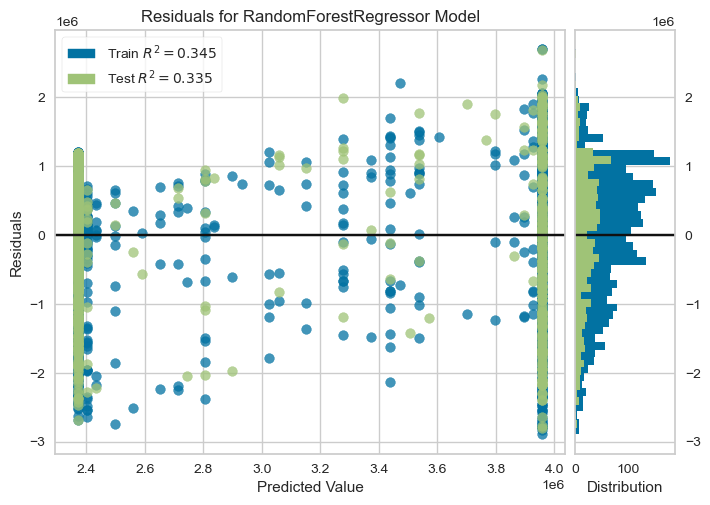

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [61]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

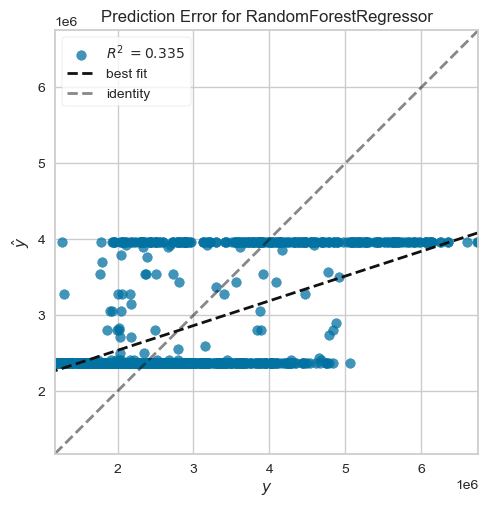

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [66]:
# Plotting the prediction error
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [67]:
# Plotting the observed against the predicted data
import matplotlib.pyplot as plt

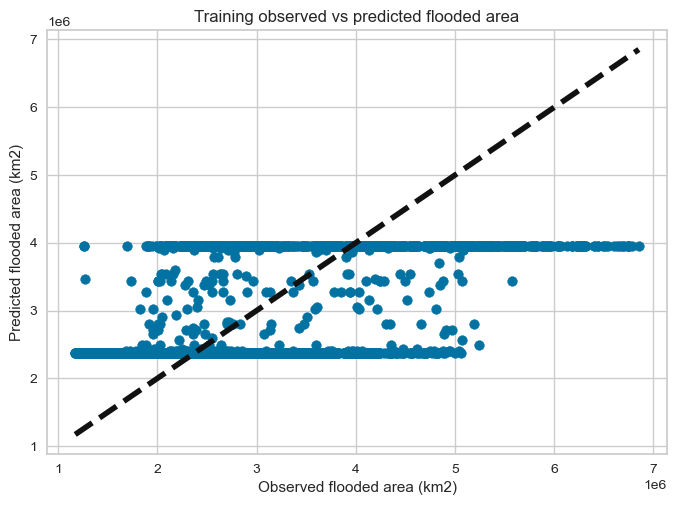

In [75]:
# For the training dataset
# Setting the boundaries and characteristics of the plot
fig, ax = plt.subplots()
ax.scatter(y_train, rf_y_predtr)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw = 4) # The line of best fit
# Labelling
ax.set_ylabel('Predicted flooded area (km2)')
ax.set_xlabel('Observed flooded area (km2)')
plt.title('Training observed vs predicted flooded area')
plt.show()

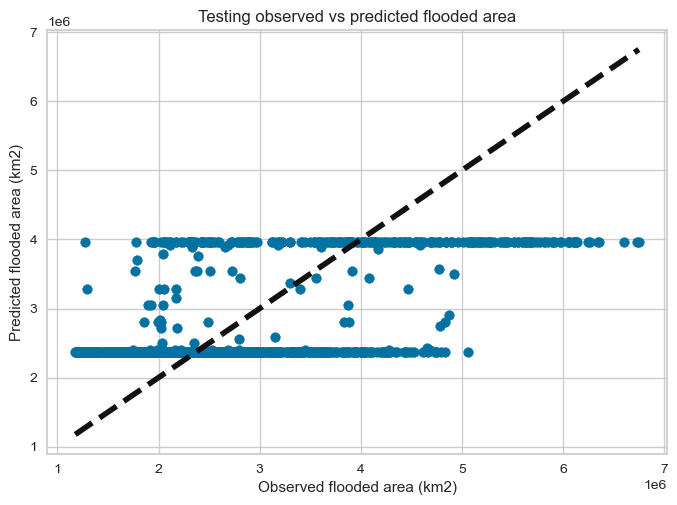

In [76]:
# For the testing  dataset
# Setting the boundaries and characteristics of the plot
fig, ax = plt.subplots()
ax.scatter(y_test, rf_y_predts)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 4) # The line of best fit
# Labelling
ax.set_ylabel('Predicted flooded area (km2)')
ax.set_xlabel('Observed flooded area (km2)')
plt.title('Testing observed vs predicted flooded area')
plt.show()

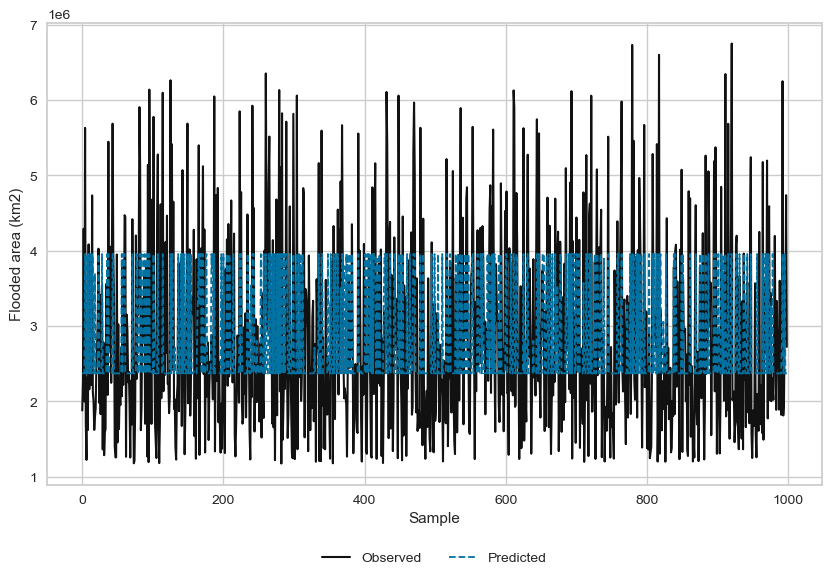

In [82]:
# Plotting the observed and predicted data
# Setting the boundaries and characteristics 
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-', lw = 1.5)
plt.plot(x_ax, rf_y_predts, label ='Predicted', color = 'b', linestyle = '--', lw = 1.3)
plt.ylabel('Flooded area (km2)')
plt.xlabel('Sample')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()